## Predicting Rental Prices (ML Regression Analysis)

<b> Load the Data and Exploring Some Statistical Features:
    
With a dataset of different borough features and their rental prices, Regression Analysis will be made to investigate what factors most affect to rents and predict the rental prices for new houses.

In this project I will be working with a real dataset provided by StreetEasy that contains a sample of 5,000 rentals listings in NYC. To get a better understanding of the dataset we can use `Pandas` to explore the data in a `DataFrame` form. In the code block below I have imported Pandas and other necessary librarires for further process.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [37]:
# loading dataset to DataFrame and inspecting first five rows using .head() method
df = pd.read_csv('https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv')
df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         5000 non-null   int64  
 1   building_id       5000 non-null   int64  
 2   rent              5000 non-null   int64  
 3   bedrooms          5000 non-null   float64
 4   bathrooms         5000 non-null   int64  
 5   size_sqft         5000 non-null   int64  
 6   min_to_subway     5000 non-null   int64  
 7   floor             5000 non-null   float64
 8   building_age_yrs  5000 non-null   int64  
 9   no_fee            5000 non-null   int64  
 10  has_roofdeck      5000 non-null   int64  
 11  has_washer_dryer  5000 non-null   int64  
 12  has_doorman       5000 non-null   int64  
 13  has_elevator      5000 non-null   int64  
 14  has_dishwasher    5000 non-null   int64  
 15  has_patio         5000 non-null   int64  
 16  has_gym           5000 non-null   int64  


In [39]:
df.describe()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5526.909400,5.122007e+07,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200,0.429600,0.12860,0.133800,0.228000,0.240000,0.155600,0.045600,0.143800
std,3263.692417,2.802283e+07,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501,0.495069,0.33479,0.340471,0.419585,0.427126,0.362512,0.208637,0.350922
min,1.000000,7.107000e+03,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2699.750000,2.699811e+07,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5456.500000,5.069894e+07,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8306.000000,7.572064e+07,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11349.000000,9.998721e+07,20000.000000,5.000000,5.000000,4800.000000,51.000000,83.000000,180.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
df.shape

(5000, 20)

<b> Cleaning the Dataset:
    
Dependent variable will be predicted by using the values of independent variable(s) with Multiple Linear Regression model (MLR). 
After cheking all features about dataset, `rent` of houses will be used for MLR as a dependent variable . The values will be predicted in dependent variable(rent column) using the features of independent variables those are binary and continous or discrete in dataset. Moreover, some features will be romoved from dataset too.

In [41]:
#checking the duplicated values in a dataset
df.duplicated(subset=df.columns).sum()

0

In [42]:
# features_to_remove
features_to_remove = df[['rental_id', 'building_id', 'neighborhood', 'submarket', 'borough']]

In [43]:
df.drop(features_to_remove, axis = 1, inplace = True)

Now we just have to check our data to make sure we don't have any missing values, or `NaN`s, which will prevent the Linear Regression model from running correctly. To do this we can use the statement `isna().any()`. The output will return to `True` if any NaN values will be founded in dataset, otherwise `False`. As we have seen, there are no missing or duplicated values in a dataset.

In [44]:
df.isna().any()

rent                False
bedrooms            False
bathrooms           False
size_sqft           False
min_to_subway       False
floor               False
building_age_yrs    False
no_fee              False
has_roofdeck        False
has_washer_dryer    False
has_doorman         False
has_elevator        False
has_dishwasher      False
has_patio           False
has_gym             False
dtype: bool

<b> EDA - Exploratory Data Analysis
    
Now let's investigate some of the different features which can have more impact on dependent variable. In this period pandas helpful `.corr()` method that allows us to see the correlation coefficients for each pair of our different features. As we now, if we have correlation coefficients `close to 1 or -1` mean that we have positive or negative linear relationships accordingly. But coefficients those are around `0` mean that we have quite weak relationship between variables.
    
Finally, some of the variables will be visualized in scatter plot to see the linear relationships on different subsets of dataset.

In [45]:
#defining correlation coefficients
corr_grid = df.corr()
corr_grid

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
rent,1.000000,0.531200,0.733644,0.808784,0.003652,0.272351,-0.122302,-0.091769,0.081286,0.096136,0.099106,0.120822,0.096631,0.058260,0.093737
bedrooms,0.531200,1.000000,0.647499,0.738410,0.053365,-0.006468,0.070329,-0.067047,-0.012395,-0.002582,-0.034031,-0.027457,-0.007094,0.003772,-0.018393
bathrooms,0.733644,0.647499,1.000000,0.770593,0.054891,0.145303,-0.103050,-0.052726,0.044597,0.052827,0.044997,0.051410,0.060295,0.057091,0.057221
size_sqft,0.808784,0.738410,0.770593,1.000000,0.024422,0.100234,0.026434,-0.129534,0.038302,0.052746,0.046402,0.060830,0.063051,0.036600,0.047815
min_to_subway,0.003652,0.053365,0.054891,0.024422,1.000000,0.029242,-0.138273,0.054977,-0.021765,-0.017840,-0.006722,-0.014314,-0.022058,-0.005652,-0.014924
floor,0.272351,-0.006468,0.145303,0.100234,0.029242,1.000000,-0.352757,0.088094,0.079554,0.060379,0.123108,0.109258,0.036979,0.068119,0.089361
building_age_yrs,-0.122302,0.070329,-0.103050,0.026434,-0.138273,-0.352757,1.000000,-0.213815,-0.055064,-0.031511,-0.058163,-0.067261,-0.040078,-0.048155,-0.063687
no_fee,-0.091769,-0.067047,-0.052726,-0.129534,0.054977,0.088094,-0.213815,1.000000,-0.089593,-0.082366,-0.175022,-0.155638,-0.086081,-0.052192,-0.105797
has_roofdeck,0.081286,-0.012395,0.044597,0.038302,-0.021765,0.079554,-0.055064,-0.089593,1.000000,0.331626,0.506101,0.535333,0.369123,0.145139,0.579826
has_washer_dryer,0.096136,-0.002582,0.052827,0.052746,-0.017840,0.060379,-0.031511,-0.082366,0.331626,1.000000,0.356328,0.410523,0.471480,0.159091,0.376372


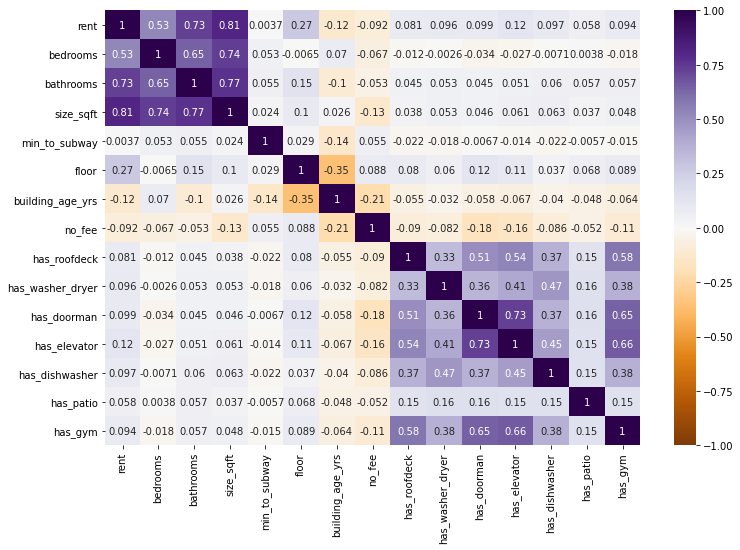

In [46]:
#plotting heatmap to see linear relationships
plt.figure(figsize = (12, 8))
sns.heatmap(corr_grid,
            vmin=-1, center = 0, vmax=1, cmap='PuOr', annot=True)
plt.show()

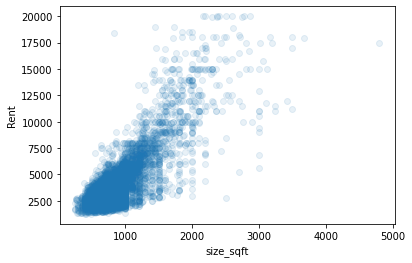

In [47]:
# plot size_sqft against rents here
plt.scatter(df['size_sqft'], df.rent, alpha = .1)
plt.xlabel('size_sqft')
plt.ylabel('Rent')
plt.show()

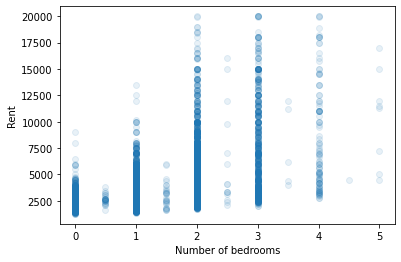

In [48]:
# plot number of bedrooms against rents here
plt.scatter(df['bedrooms'], df.rent, alpha = .1)
plt.xlabel('Number of bedrooms')
plt.ylabel('Rent')
plt.show()

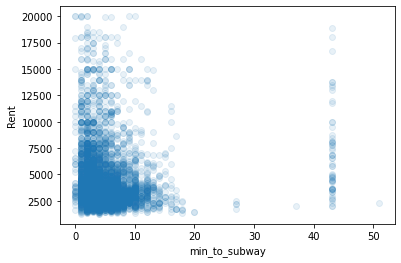

In [49]:
# plot min_to_subway against rents here
plt.scatter(df['min_to_subway'], df.rent, alpha = .1)
plt.xlabel('min_to_subway')
plt.ylabel('Rent')
plt.show()

<b> Data Selection and Different Subsets of Dataset:
    
We can see from the correlation table that we have better and weak, or no linear relationships among variables. So what we need to use for our model selection data? Regarding to this question, I can use different subsets of data for all binary variables, variables with higher coefficients, all numeric variables separately or all features together in dataset.

In [50]:
# subset of only higher correlated variables
higher_corr_feats = df[['bedrooms', 'bathrooms', 'size_sqft']]

In [51]:
# subset of all numeric variables
all_num_feats = df[['min_to_subway', 'floor', 'building_age_yrs']]

In [52]:
# subset of all binary variables
all_ban_feats = df[['no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

In [53]:
# subset of all variables of dataset
all_feats = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
                        'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

<b> Further Modeling for Multiple Linear Regression:

Scikit-learn library will be using to create and fit our model. Additionally, accuracy of model will be checked with `.score()` method which will return coefficients of determination `R²(R-squared)` of prediction. 
    
On the other hand, model has a `.predict()` method which uses the model's coefficients to calculate the predicted rent. 

Lastly, we can check some of these variables by plotting them below. We can see how much `X values` have weight on `y values` for evaluating and understanding of models. Let's define a helpful function below.

In [54]:
def mlr_models(features):
    # defining dependent variable for model
    y = df.loc[:, 'rent']
    # defining independent variables for model
    X = features.loc[:, :]
    
    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)
    
    # create and train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # defining model accuracy score
    acc = 'Accuracy score: ' + str(round(model.score(X_test, y_test)*100, 3))
    print(acc)
    
    # print the model features and their corresponding coefficients from most predictive to least predictive
    print(sorted(list(zip(features,model.coef_)),key = lambda x: abs(x[1]), reverse=True))
    
    # calculate the predicted rents from the test data
    y_predict = model.predict(X_test)
    
    # finding observed value and the mean value that the model predicts for that observation
    residuals = y_test - y_predict
    
    # plot the actual rent vs the predicted rent for the test data
    plt.scatter(y_test,y_predict, alpha = .1)
    
    plt.title('Actual Rent vs Predicted Rent')
    plt.xlabel('Actual Rents')
    plt.ylabel('Predicted Rents')
    plt.ylim(1,20000)
    plt.show()
    
    # checking the statistical normality assumption
    plt.hist(residuals, alpha = .5)
    plt.title('Normality Assumption')
    plt.show()

    # checking the statistical homoscedasticity assumption
    plt.scatter(y_predict, residuals, alpha = .1)
    plt.axhline(0, linestyle = '--', color = 'black')
    plt.xlim(1, 20000)
    plt.title('Homoscedasticity Assumption')
    plt.show()

Now models will be running on the following subsets of data using `mlr_models()`:

* `higher_corr_feats`: only higher correlated variables
* `all_ban_feats`: all binary features that have a response range [0,1]
* `all_num_feats`: all features that vary on a greater range than [0,1]
* `all_feats`: all features

How does changing the feature sets affect the model's `R²(R-squared)` value? Which features are most important to predicting rents in the different models? Which models satisfy with normality assumption and appear more or less homoscedastic?

Accuracy score: 72.077
[('bathrooms', 1550.6920463869326), ('bedrooms', -583.6522683331009), ('size_sqft', 4.809110476851132)]


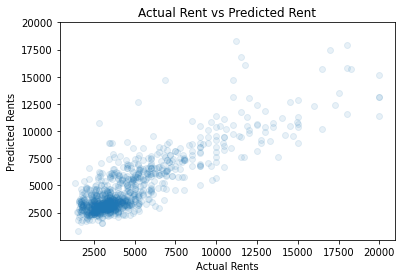

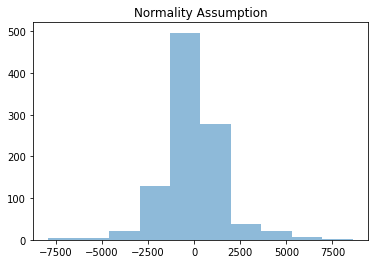

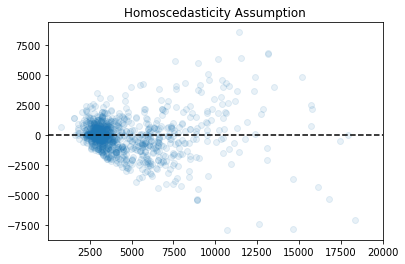

In [55]:
mlr_models(higher_corr_feats)

Accuracy score: 0.567
[('no_fee', -460.8262671311453), ('has_patio', 419.9307074551771), ('has_dishwasher', 416.4759590905753), ('has_elevator', 304.1000913813343), ('has_doorman', 214.71697969119347), ('has_washer_dryer', 180.4326563078588), ('has_roofdeck', 75.6007246749773), ('has_gym', 51.636314919778556)]


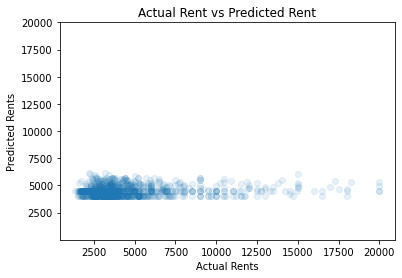

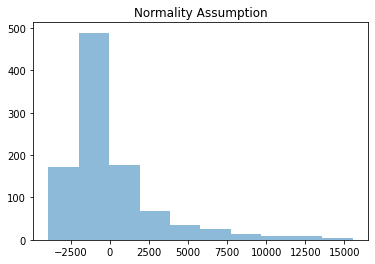

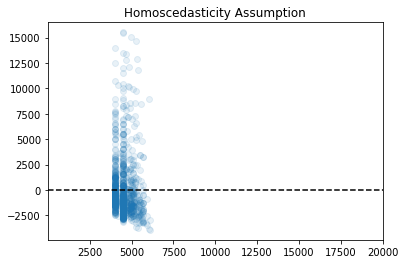

In [56]:
mlr_models(all_ban_feats)

Accuracy score: 3.453
[('floor', 74.76532856618377), ('min_to_subway', -6.568781751264431), ('building_age_yrs', -2.8817751050860134)]


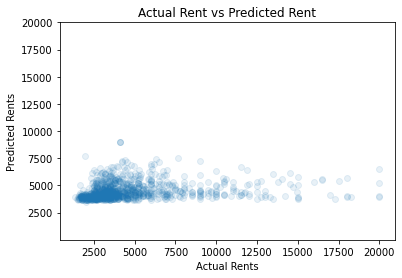

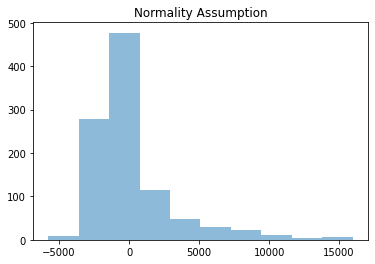

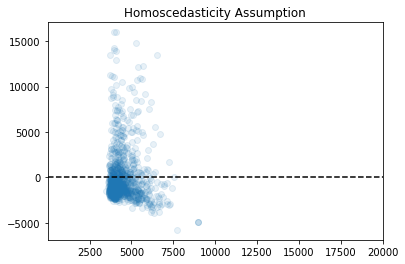

In [57]:
mlr_models(all_num_feats)

Accuracy score: 73.66
[('bathrooms', 1279.0173598664057), ('bedrooms', -429.55644160289955), ('has_elevator', 211.7017876550876), ('has_washer_dryer', 172.46387636873047), ('has_patio', -120.8736560816736), ('no_fee', -90.27892053890726), ('has_gym', -87.45474201302356), ('has_roofdeck', 65.99833808565279), ('has_dishwasher', 64.43419636234563), ('floor', 40.68188429199213), ('has_doorman', -29.11005092607321), ('min_to_subway', -19.896529887556156), ('size_sqft', 4.699434482841135), ('building_age_yrs', -4.468321266439303)]


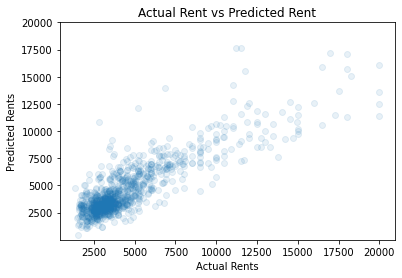

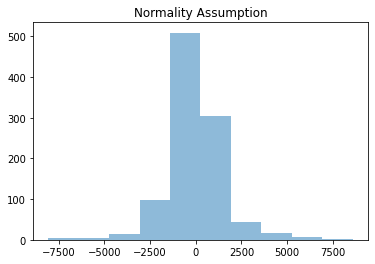

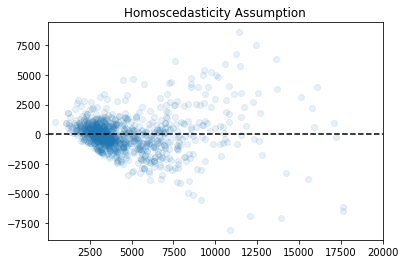

In [58]:
mlr_models(all_feats)

<b> Checking Different Regression Algorithms:
    
After checking the different features and determining the best model accuracy using MLR in dataset above, it can be better to compare our model with other regression algorithms to see if we have any higher results than previous one. It will be checked below techniques;

- `Decision Tree Regressor`
- `Random Forest Regressor`

In [59]:
# defining independent variables for model
X = df.iloc[:, 1:15]
# defining dependent variable for models
y = df.loc[:, 'rent']

Decision Tree Regressor

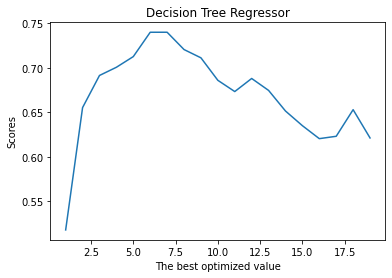

Decision Tree Regressor acc: 74.015 



In [69]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)

# checking the best optimized tree
scores = []
for i in range(1, 20):
    regr = DecisionTreeRegressor(max_depth = i)
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test, y_test))

# plotting to check the best value
plt.plot(range(1, 20), scores)
plt.title('Decision Tree Regressor')
plt.xlabel('The best optimized value')
plt.ylabel('Scores')
plt.show()


# create and train model
regr = DecisionTreeRegressor(max_depth = 6)
regr.fit(X_train, y_train)
# defining model accuracy score
print('Decision Tree Regressor acc: ' + str(round(regr.score(X_test, y_test)*100, 3)), '\n')

Random Forest Regressor:

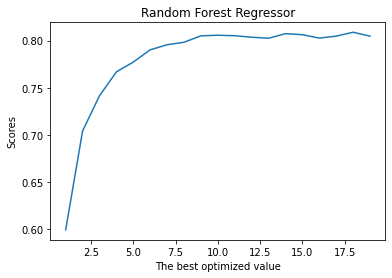

Random Forest Regressor acc: 79.876


In [61]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)

# checking the best optimized value
rfr_scores = []
for i in range(1, 20):
    rfr = RandomForestRegressor(max_depth = i)
    rfr.fit(X_train, y_train)
    rfr_scores.append(rfr.score(X_test, y_test))
    
# plotting to check the best value
plt.plot(range(1, 20), rfr_scores)
plt.title('Random Forest Regressor')
plt.xlabel('The best optimized value')
plt.ylabel('Scores')
plt.show()


# create and train model
rfr = RandomForestRegressor(max_depth =8)
rfr.fit(X_train, y_train)
# defining model accuracy score
print('Random Forest Regressor acc: ' + str(round(rfr.score(X_test, y_test)*100, 3)))

<b> Sample Demonstration:

Compared to different regression models we can see that `Random Forest Regressor` algorithm has a better accuracy than both of linear and decision tree regression. Let's take as an example Random Forest Regressor and Decision Tree Regressor to compare results for random test sample. As we have seen below, predicted price by Random Forest Regressor model much more closer to the actual price.

In [62]:
random_index = np.random.randint(X_test.shape[0])

print("Prediction made by Decision Tree Regressor:")
print("\t\tPredicted price:  ", np.round(regr.predict(X_test[random_index:random_index+1])[0],3))
print("\t\tActual price:  ", np.round(y_test[random_index],3))

print("Prediction made by Random Forest Regressor:")
print("\t\tPredicted price:  ", np.round(rfr.predict(X_test[random_index:random_index+1])[0],3))
print("\t\tActual price:  ", np.round(y_test[random_index],3))

Prediction made by Decision Tree Regressor:
		Predicted price:   3759.278
		Actual price:   5500
Prediction made by Random Forest Regressor:
		Predicted price:   4124.197
		Actual price:   5500


<b> Future House Rents in NYC:

The data was loaded, cleaned, modeled and evaluated above, but what will be the future house rents in NYC? Regarding to statistical normality and homoscedasticity assumptions, and accuracy scores of regression models above, our best model was using `all_features`. 
    
In conclusion, results show for this particular prediction that Random Forest Regressor best predicts house rental prices. So we will work with `Random Forest Regressor` again by running the cell below to grab all the features and retrain our model on them. Let's use our model to make a prediction.

In [63]:
all_feats[:2]

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0


In [70]:
# defining independent variables for model
X = df.iloc[:, 1:15]
# defining dependent variable for models
y = df.loc[:, 'rent']

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)
    
# create and train model
rfr = RandomForestRegressor(max_depth =8)
rfr.fit(X_train, y_train)


print('To give some perspective on the rents in NYC already out there, we have provided the mean, minimum, and maximum values for each feature below: ', '\n')
results = pd.DataFrame(list(zip(X.columns,X.describe().loc['mean'],X.describe().loc['min'],X.describe().loc['max'])),
                           columns=['Independent_variables','Mean','Min','Max'],
                           index = range(1,15))
print(results)

To give some perspective on the rents in NYC already out there, we have provided the mean, minimum, and maximum values for each feature below:  

   Independent_variables      Mean    Min     Max
1               bedrooms    1.3957    0.0     5.0
2              bathrooms    1.3216    0.0     5.0
3              size_sqft  920.1014  250.0  4800.0
4          min_to_subway    5.0792    0.0    51.0
5                  floor   10.1902    0.0    83.0
6       building_age_yrs   52.0932    0.0   180.0
7                 no_fee    0.4296    0.0     1.0
8           has_roofdeck    0.1286    0.0     1.0
9       has_washer_dryer    0.1338    0.0     1.0
10           has_doorman    0.2280    0.0     1.0
11          has_elevator    0.2400    0.0     1.0
12        has_dishwasher    0.1556    0.0     1.0
13             has_patio    0.0456    0.0     1.0
14               has_gym    0.1438    0.0     1.0


In [71]:
# these are example values, it can be used any set of values for rental prices
new_house_rent1 = np.array([1, 2, 950, 15, 12, 50, 0, 0, 1, 0, 1, 1, 0, 1]).reshape(1, -1)
new_house_rent2 = np.array([2, 2, 1200, 30, 14, 60, 0, 1, 1, 0, 1, 1, 0, 1]).reshape(1, -1)

In [72]:
rfr.predict(new_house_rent1)

array([4953.26812128])

In [73]:
rfr.predict(new_house_rent2)

array([5680.46819572])